# PROJECT
# Analysis of the Android App Market on Google Play
![](http://3.bp.blogspot.com/-gC805g3FwR0/VUnpXFFz6II/AAAAAAAACQo/Dw7eB8X_svE/s1600/Android-app-on-google-play.png)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Introduction
***
## About-Project:
>This exploratory project was perfomed as a class work in the Group C9 of the Data science and artificial intelligence track of the women techsters fellowship.It tries to explore the android applications market to givebirth to insight that would drive growth of the market and as well increase consumer retention.The analysis will be performed using python libraries pandas and numpyand visualisation using "seaborn" and "matplotlib" libraries.

## About-Dataset:
>The data for this project was scraped from the Google Play website. While there are many popular datasets for Apple App Store, there aren't many for Google Play apps, which is partially due to the increased difficulty in scraping the latter as compared to the former. The data files are as follows:

`apps.csv`: contains all the details of the apps on Google Play including the size, number of installations, price etc. These are the features that describe an app.

`user_reviews.csv`: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed, passed through a sentiment analyzer engine and tagged with its sentiment score.


## Basic Questions
+ What type of Apps are the most popular ?
+ Which Category of Apps has the most Reviews?
+ Which Category App's have the most number of installs?
+ Which Category has the highest number of Apps?
+ Which Category of APPS from Content Rating Column is common on the Play Store?
+ Which Category of Apps from Content Rating Column and Type column are found in the play store?


## Project Participants include:
1. Lydia Tuwei ,

2. Obasohan Lucy,

3. Oluwabusola Talabi,

4. Love Chukwuegbo,

5. Ngozi Ihemadu,

6. Maria Koko,

7. Manuella Kolela,

8. Olutola Awosiku

9. Khadijah Abdulganiyy.

# Preparing the Environment:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Review.


In [ ]:
google_play = pd.read_csv("/content/drive/MyDrive/googleplaystore.csv")
google_reviews = pd.read_csv('/content/drive/MyDrive/googleplaystore_user_reviews.csv') 

In [ ]:
google_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
google_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
google_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
google_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


***

## Data Wrangling and Cleaning

The process of cleaning and transforming raw data prior to processing and analysis is known as data preparation. It is an important step before processing which frequently involves reformatting data, making data corrections, and combining data sets to enrich data. The process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database is known as data cleansing. It refers to identifying incomplete, incorrect, inaccurate, or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.


In [ ]:
#merging both Datasets into a single dataframe
google_data = pd.merge(google_play, google_reviews, how = 'left' ,on = 'App')


In [ ]:

google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131971 entries, 0 to 131970
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     131971 non-null  object 
 1   Category                131971 non-null  object 
 2   Rating                  130458 non-null  float64
 3   Reviews                 131971 non-null  object 
 4   Size                    131971 non-null  object 
 5   Installs                131971 non-null  object 
 6   Type                    131970 non-null  object 
 7   Price                   131971 non-null  object 
 8   Content Rating          131970 non-null  object 
 9   Genres                  131971 non-null  object 
 10  Last Updated            131971 non-null  object 
 11  Current Ver             131963 non-null  object 
 12  Android Ver             131968 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

In [ ]:
google_data.head()   #EXAMNING THE FIIRST 5 ROWS OF THE NEW DF

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN


In [ ]:

google_data.tail()  #EXAMINING THE LAST 5 ROWS OF THE DF

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
131966,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,NaN,NaN,NaN,NaN
131967,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,NaN,NaN,NaN,NaN
131968,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,NaN,NaN,NaN,NaN
131969,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,NaN,NaN,NaN,NaN
131970,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [ ]:
google_data.shape   #CHECKING TH SHAPE OF THE DF

(131971, 17)

In [ ]:

google_data.describe()   #CHECKING THE DESCRIPTION OF STATISTCAL VARIABLES IN THE DF

,Rating,Sentiment_Polarity,Sentiment_Subjectivity
count,130458.000000,72615.000000,72615.000000
mean,4.313525,0.157320,0.494162
std,0.311306,0.332652,0.240144
min,1.000000,-1.000000,0.000000
25%,4.200000,0.000000,0.380000
50%,4.400000,0.129167,0.509740
75%,4.500000,0.356250,0.633333
max,19.000000,1.000000,1.000000


In [ ]:
google_data.columns # checking the names of all the columns to ensure proper naming conventons is inplace

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

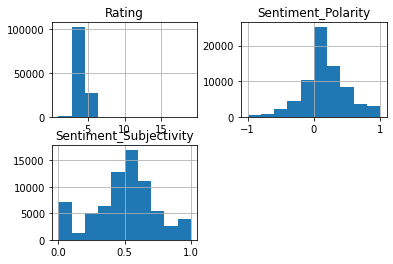

In [ ]:
google_data.hist(); # ASSESSING THE STATISTICAL TO CHECK THE SKEWNESS AND DISTRBUTION OF THE DF

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


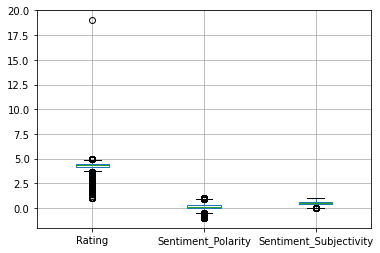

In [ ]:
google_data.boxplot(); #USING THE BOXPLOT TO EXPLORE AND CHECK FOR OUTLIERS

The boxplot shows an outlier in the DF(Rating col)

In [ ]:
for x in google_data['Rating']:
    if x > 5:
        print(x)

19.0


The function shows there s an outlier of 19 in the rating column

# **DATA CLEANING CONT'**

---



AND MAYBE A LITTLE MORE EXPLORATION::

In [ ]:
google_data.isnull().sum()  #CHECKING FOR THE TOTAL NULL VALUES PER COLUMN

App                           0
Category                      0
Rating                     1513
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                1
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   3
Translated_Review         59366
Sentiment                 59356
Sentiment_Polarity        59356
Sentiment_Subjectivity    59356
dtype: int64

Checking for duplicates and dropping the rows with the duplicates

In [ ]:
google_data.duplicated().sum()  

81293

In [ ]:
google_data.drop_duplicates(inplace = True)  #using the inplace command to run over the original df

In [ ]:
google_data.info()  #confirming the rows were successfully dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50678 entries, 0 to 131970
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     50678 non-null  object 
 1   Category                50678 non-null  object 
 2   Rating                  49175 non-null  float64
 3   Reviews                 50678 non-null  object 
 4   Size                    50678 non-null  object 
 5   Installs                50678 non-null  object 
 6   Type                    50677 non-null  object 
 7   Price                   50678 non-null  object 
 8   Content Rating          50677 non-null  object 
 9   Genres                  50678 non-null  object 
 10  Last Updated            50678 non-null  object 
 11  Current Ver             50670 non-null  object 
 12  Android Ver             50675 non-null  object 
 13  Translated_Review       40414 non-null  object 
 14  Sentiment               40422 non-nul

In [ ]:
google_data.duplicated().sum() # confirming there are no more duplicate rows

0

In [ ]:
google_data.isnull().sum()  # checkng for null values

App                           0
Category                      0
Rating                     1503
Reviews                       0
Size                          0
Installs                      0
Type                          1
Price                         0
Content Rating                1
Genres                        0
Last Updated                  0
Current Ver                   8
Android Ver                   3
Translated_Review         10264
Sentiment                 10256
Sentiment_Polarity        10256
Sentiment_Subjectivity    10256
dtype: int64

In [ ]:
google_data[google_data['Type'].isnull()] #this row has too many null values and wont help in analysis, so it would be dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
127690,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [ ]:
google_data[google_data['Content Rating'].isnull()] # This is the row with the outlier in rating. values here may not be completely accurate, so it would be dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
131406,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN,NaN,NaN,NaN


In [ ]:
google_data[google_data['Current Ver'].isnull()]  #there are only 8 rows and we dont know if theres a current version of the app, so it would be dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
210,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,NaN,NaN,NaN,NaN
35973,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up,NaN,NaN,NaN,NaN
121023,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up,NaN,NaN,NaN,NaN
122251,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up,NaN,NaN,NaN,NaN
123172,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up,NaN,NaN,NaN,NaN
123285,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up,NaN,NaN,NaN,NaN
124060,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up,NaN,NaN,NaN,NaN
131276,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up,NaN,NaN,NaN,NaN


In [ ]:
google_data[google_data['Android Ver'].isnull()] #this would be dropped so it doesnt interfere with analysis

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
116097,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN,NaN,NaN,NaN,NaN
116134,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN,NaN,NaN,NaN,NaN
131406,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN,NaN,NaN,NaN


In [ ]:
google_data[google_data['Sentiment'].isnull()].head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
59,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN,NaN,NaN,NaN
60,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN,NaN,NaN,NaN
61,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,NaN,NaN,NaN,NaN
62,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,NaN,NaN,NaN,NaN
63,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,NaN,NaN,NaN,NaN
64,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,NaN,NaN,NaN,NaN
73,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,NaN,NaN,NaN,NaN
165,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,NaN,NaN,NaN,NaN


In [ ]:
google_data = google_data.dropna(subset=['Type','Content Rating', 'Current Ver', 'Android Ver'])  #dropping the rows with low numbers of null values as it would have no significant effect on the data


In [ ]:
google_data.isnull().sum() #Rechecking for null values

App                           0
Category                      0
Rating                     1498
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         10252
Sentiment                 10244
Sentiment_Polarity        10244
Sentiment_Subjectivity    10244
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


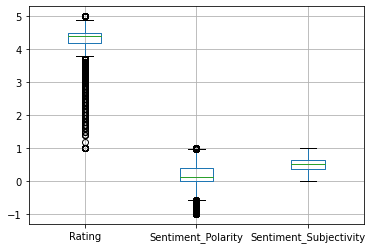

In [ ]:
google_data.boxplot(); # there are no outliers

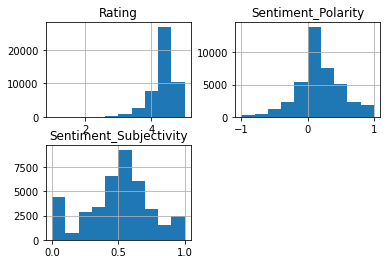

In [ ]:
google_data.hist(); #checkng if theres any change 

**MORE CLEANING*

*   Checking each column and dropping off columns we thnk would not be helpful in analysis

*   Finding the statistical averages and comparing with the mode of columns with null values then filling them up to clan that column



In [ ]:
mean_rating = google_data['Rating'].agg(np.mean)

print(mean_rating)   #calculating the mean of values in rating column

4.300089489098601


In [ ]:
google_data['Rating'] = google_data['Rating'].fillna(mean_rating) # filling the NAN values in the rating column with the mean

In [ ]:
google_data.isnull().sum() #confirming that the rating col has no null values

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         10252
Sentiment                 10244
Sentiment_Polarity        10244
Sentiment_Subjectivity    10244
dtype: int64

In [ ]:
google_data.drop('Translated_Review', axis =1, inplace = True)  #dropping the translated_review column as it would not be helpful in analysis

In [ ]:
google_data['Sentiment'].unique()  #checking for the unique values n this column

array([nan, 'Negative', 'Neutral', 'Positive'], dtype=object)

In [ ]:
google_data['Sentiment_Polarity'].unique()# checking for the unique values n this col

array([        nan, -0.25      , -0.725     , ...,  0.00272109,
       -0.0440051 ,  0.50982143])

In [ ]:
mean_subsen = google_data['Sentiment_Subjectivity'].agg(np.mean) 
print(mean_subsen) 

0.4950814931787424


In [ ]:
mode_ss= google_data['Sentiment_Subjectivity'].mode()
print(mode_ss)

0    0.0
dtype: float64


In [ ]:
google_data['Sentiment_Subjectivity'] = google_data['Sentiment_Subjectivity'].fillna(float(0))

In [ ]:
mean_subpol = google_data['Sentiment_Polarity'].agg(np.mean)

print(mean_subpol) 

0.16833930983737727


In [ ]:
mode_sp= google_data['Sentiment_Polarity'].mode()
print(mode_sp)

0    0.0
dtype: float64


In [ ]:
google_data['Sentiment_Polarity'] = google_data['Sentiment_Polarity'].fillna(float(0))

In [ ]:
google_data.isnull().sum()

App                           0
Category                      0
Rating                        0
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Sentiment                 10244
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

In [ ]:
google_data.drop('Sentiment', axis =1, inplace = True)

In [ ]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50666 entries, 0 to 131970
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     50666 non-null  object 
 1   Category                50666 non-null  object 
 2   Rating                  50666 non-null  float64
 3   Reviews                 50666 non-null  object 
 4   Size                    50666 non-null  object 
 5   Installs                50666 non-null  object 
 6   Type                    50666 non-null  object 
 7   Price                   50666 non-null  object 
 8   Content Rating          50666 non-null  object 
 9   Genres                  50666 non-null  object 
 10  Last Updated            50666 non-null  object 
 11  Current Ver             50666 non-null  object 
 12  Android Ver             50666 non-null  object 
 13  Sentiment_Polarity      50666 non-null  float64
 14  Sentiment_Subjectivity  50666 non-nul

In [ ]:
google_data['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:

google_data['Price'] = google_data['Price'].str.strip('$')

In [ ]:
google_data['Price'] = google_data['Price'].str.strip(' ').astype('float')

In [ ]:
google_data['Price'].unique()


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
google_data['google_reviews'] = pd.to_numeric(google_data['Reviews'])
#google_data['google_reviews'].apply(lambda x: float{x})

In [ ]:
google_data['google_reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

In [ ]:
google_data['Installs'] = google_data['Installs'].str.strip('+')

google_data['Installs'] = google_data['Installs'].apply(lambda x:str(x).replace(',' , '') if ',' in x else str(x))


In [ ]:
google_data.dtypes

App                        object
Category                   object
Rating                    float64
Reviews                    object
Size                       object
Installs                   object
Type                       object
Price                     float64
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
google_reviews              int64
dtype: object

# **EXPLORATORY ANALYSIS AND DATA VISUALIZATION**

Exploratory data analysis is a method of analyzing data sets in order to summarize their main characteristics, often using visual methods. A statistical model can be used or not, but the primary goal of EDA is to see what the data can tell us beyond the formal modeling or hypothesis-testing task. Data visualization is the graphic representation of data. It entails creating images that communicate relationships between represented data to viewers. This communication is accomplished through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. This mapping determines how and to what extent the property of a graphic mark, such as size or color, will change to reflect data values.

PIE CHART SHOWING DISTRIBUTION OF FREE TO PAID APPS

**Which Category of Apps has the highest number of Apps based on the Type Column?**

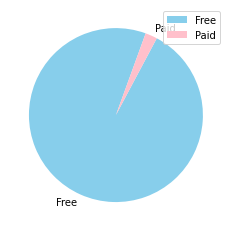

In [ ]:
plt.pie(google_data['Type'].value_counts(),
        labels=google_data['Type'].value_counts().index,
        colors=['skyblue', 'pink'], startangle=70
        
       )
plt.legend();


There are more free Apps than Paid Apps in the Playstore

In [ ]:
pd.to_numeric(google_data['Installs']).astype(float) #CONVERTING INSTALLS COLUMN TO NUMERIC

0            10000.0
1           500000.0
2           500000.0
3           500000.0
4           500000.0
             ...    
131966        5000.0
131967         100.0
131968        1000.0
131969        1000.0
131970    10000000.0
Name: Installs, Length: 50666, dtype: float64

In [ ]:
google_data.dtypes #CONFIRMING THE DATATYPE HAS CHANGED

App                        object
Category                   object
Rating                    float64
Reviews                    object
Size                       object
Installs                   object
Type                       object
Price                     float64
Content Rating             object
Genres                     object
Last Updated               object
Current Ver                object
Android Ver                object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
google_reviews              int64
dtype: object

In [ ]:
pd.to_numeric(google_data['Reviews']).astype(float) #CONVERTING REVIEWS COLUMN TO NUMERIC

0            159.0
1            967.0
2            967.0
3            967.0
4            967.0
            ...   
131966        38.0
131967         4.0
131968         3.0
131969       114.0
131970    398307.0
Name: Reviews, Length: 50666, dtype: float64

In [ ]:
grpby= google_data.groupby(['Category']) #ANALYSIS AND GROUPNG THE NUMERIC COLUMNS BY CATEGORY FOR EASE OF VISUALIZATION

a = grpby['Installs'].agg(np.mean)
b = grpby['Price'].agg(np.sum)
c = grpby['Reviews'].agg(np.mean)
d = grpby['Rating'].agg(np.sum)
print(a)
print(b)
print(c)
print(d)

Category
ART_AND_DESIGN         inf
AUTO_AND_VEHICLES      inf
BEAUTY                 inf
BOOKS_AND_REFERENCE    inf
BUSINESS               inf
COMICS                 inf
COMMUNICATION          inf
DATING                 inf
EDUCATION              inf
ENTERTAINMENT          inf
EVENTS                 inf
FAMILY                 inf
FINANCE                inf
FOOD_AND_DRINK         inf
GAME                   inf
HEALTH_AND_FITNESS     inf
HOUSE_AND_HOME         inf
LIBRARIES_AND_DEMO     inf
LIFESTYLE              inf
MAPS_AND_NAVIGATION    inf
MEDICAL                inf
NEWS_AND_MAGAZINES     inf
PARENTING              inf
PERSONALIZATION        inf
PHOTOGRAPHY            inf
PRODUCTIVITY           inf
SHOPPING               inf
SOCIAL                 inf
SPORTS                 inf
TOOLS                  inf
TRAVEL_AND_LOCAL       inf
VIDEO_PLAYERS          inf
WEATHER                inf
Name: Installs, dtype: float64
Category
ART_AND_DESIGN            5.97
AUTO_AND_VEHICLES        13.4

SCATTERPLOT SHOWING DISTRIBUTION OF CATEGORY TO PRICE

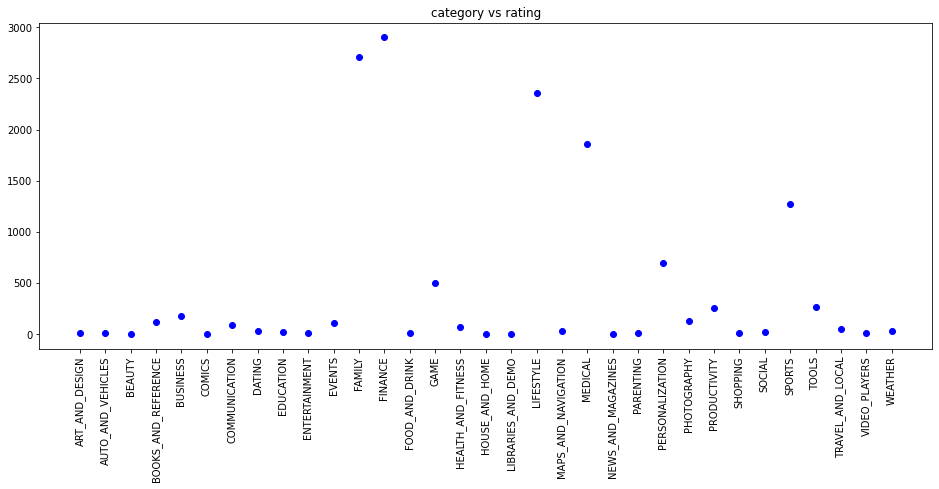

In [ ]:
plt.figure(figsize =(16, 6))
plt.plot(b, 'ro' , color = 'blue')
plt.xticks(rotation = 90)
plt.title('category vs rating')

plt.show()

BAR GRAPH SHOWING CATEGORY TO RATING DIST

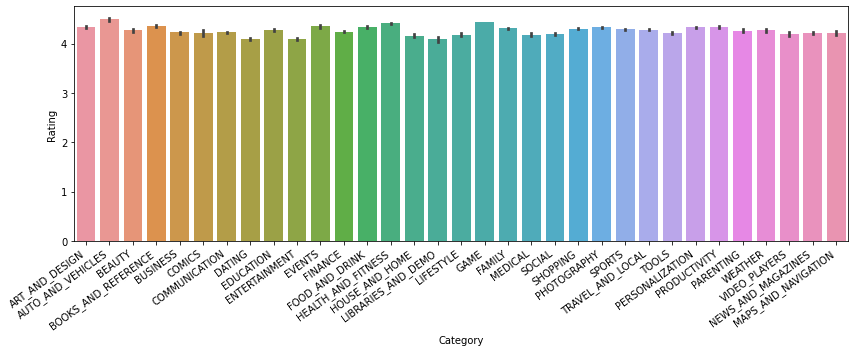

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Category', y=google_data['Rating'].sort_values(axis =0, ascending = True , inplace = False), data=google_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=36, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

BAR GRAPH SHOWING CATEGORY TO PRICE DIST

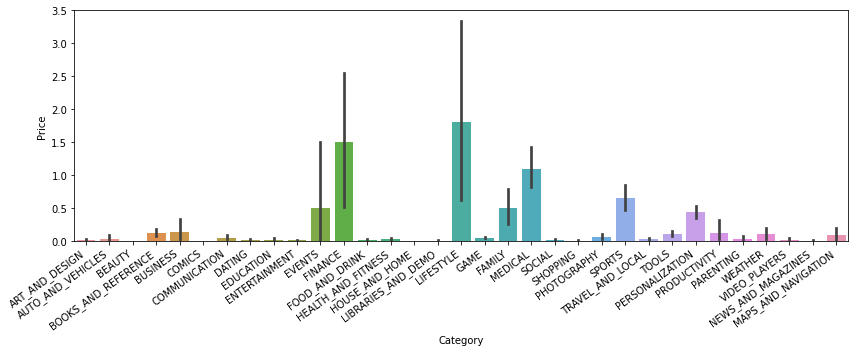

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Category', y='Price', data=google_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=36, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

BAR GRAPH SHOWNG CATEGORY TO SENTIMENT SUBJECTIVITY AND THEN SENTIMENT POLARITY

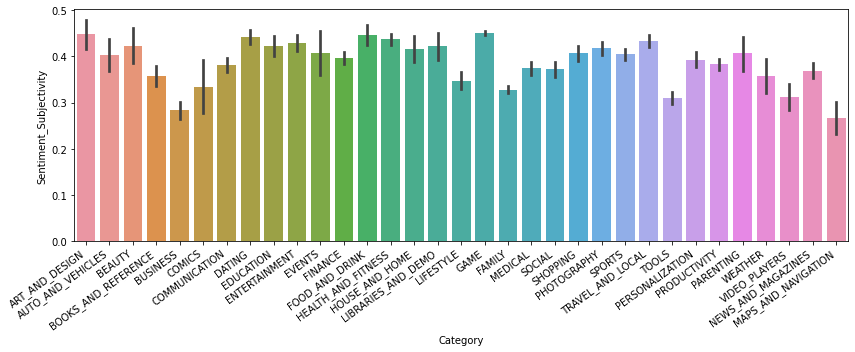

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Category', y='Sentiment_Subjectivity', data=google_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=36, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

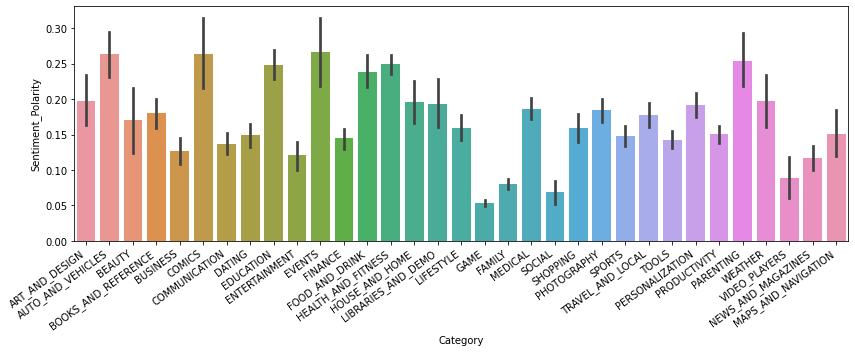

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='Category', y='Sentiment_Polarity', data=google_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=36, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

BAR GRAPH SHOWING NUMBER OF INSTALLATONS BY CATEGORY

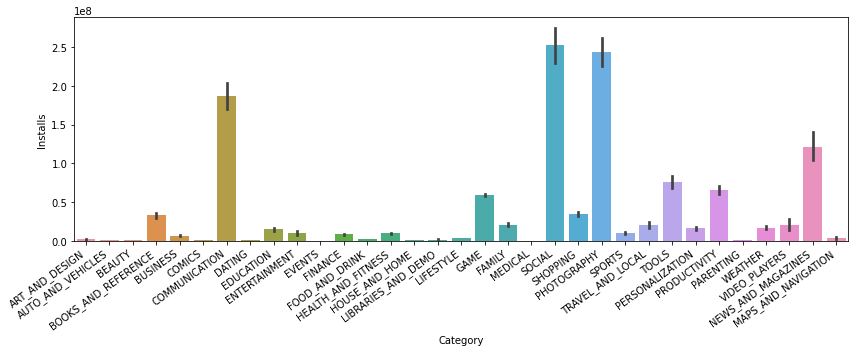

In [ ]:
installs = pd.to_numeric(google_data['Installs']).astype(float)

plt.figure(figsize=(12,5))
ax = sns.barplot(x='Category', y= installs, data=google_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=36, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show() 

DISPLOT SHOWING DISTRIBUTION OF RATING AND INSTALLS

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


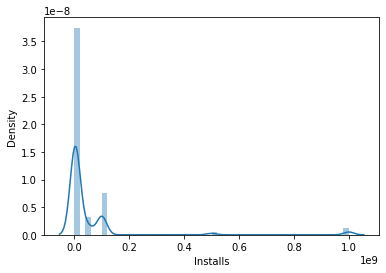

In [ ]:
sns.distplot(google_data['Installs'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


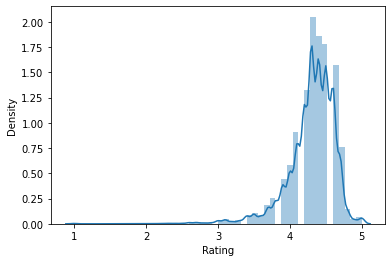

In [ ]:
sns.distplot(google_data['Rating'])
plt.show()

GRAPH SHOWING THE VALUE COUNT OF THE FIRST 50 ROWS IN THE CATEGORY COL

**Which Category App's have the most number of installs?**

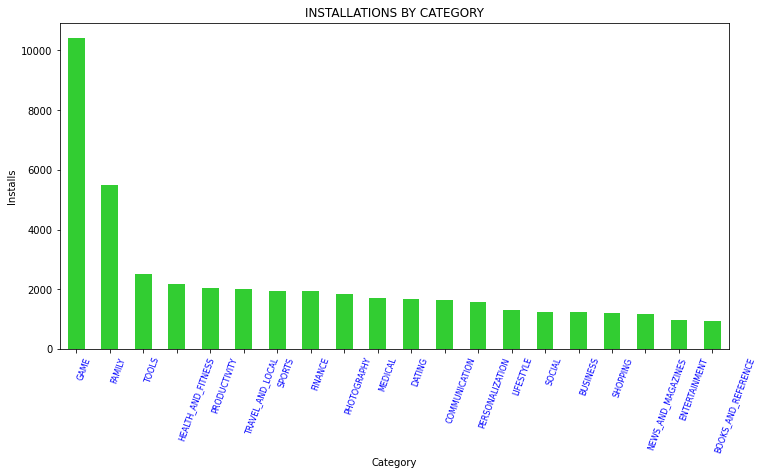

In [ ]:
plt.figure(figsize =(12,6))
ax = google_data['Category'].value_counts().head(20).plot(kind='bar', color = 'limegreen')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="left", color = 'b')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('INSTALLATIONS BY CATEGORY')
plt.show()

COMPARING REVIEWS BY CATEGORY

Which Category of Apps has the most Reviews?

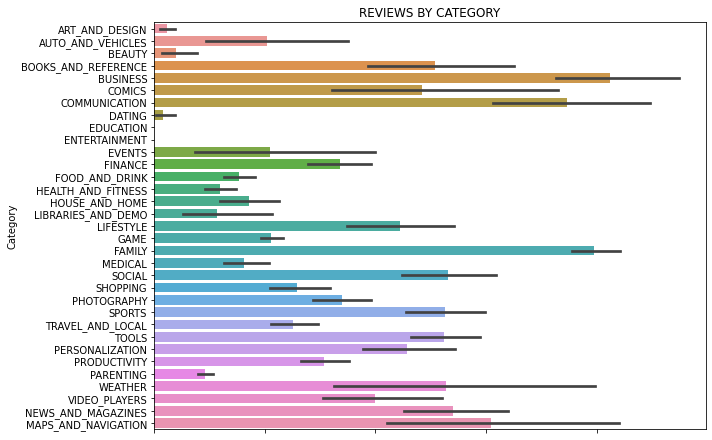

In [ ]:
reviews = pd.to_numeric(google_data['Reviews']).astype(float) #CONVERT THE REVIEWS COLUMN TO A NUMERIC COLUMN
reviews = sorted( reviews, reverse =False) #SORT THE COLUMN
plt.figure(figsize=(10,6))
ax = sns.barplot(y='Category', x= reviews, data=google_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=36, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.title('REVIEWS BY CATEGORY')
plt.show() 

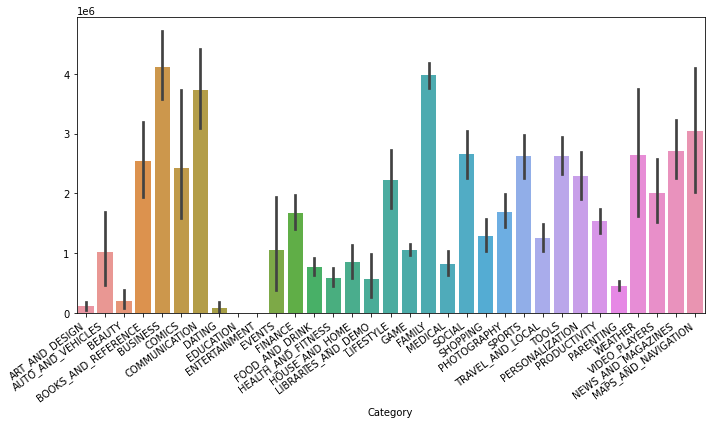

In [ ]:
reviews = pd.to_numeric(google_data['Reviews']).astype(float) 
reviews = sorted( reviews, reverse =False)
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Category', y= reviews, data=google_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=36, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show() 

In [ ]:
google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x:str(x).replace(' Varies with device' , '0') if ' Varies with device' in x else str(x))

google_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [ ]:
curver = grpby['Current Ver'].agg(np.sum)
andver = grpby['Android Ver'].agg(np.sum)

#print(curver)
#print(andver)

COUNT OF APPS BY CATEGORY

**Which Category has the highest number of Apps?**

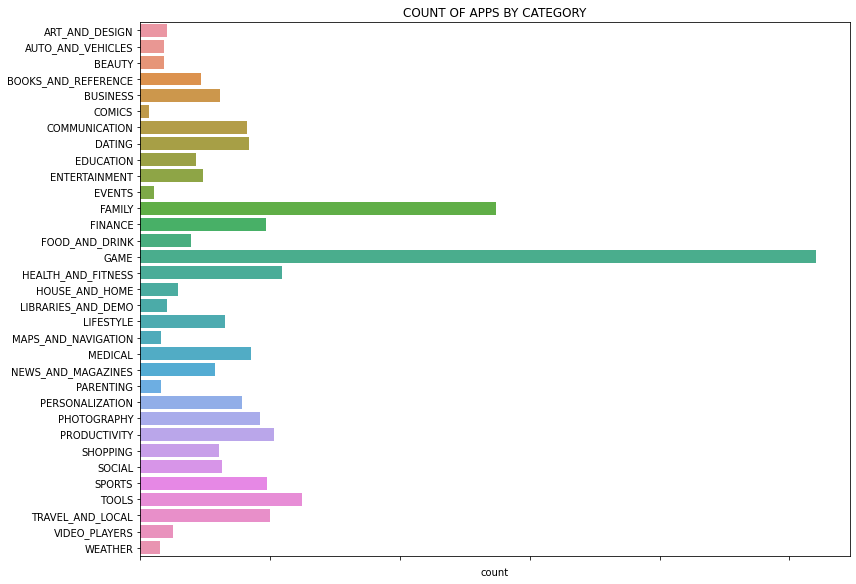

In [ ]:
carsrt = sorted( google_data['Category'], reverse =False)
plt.figure(figsize=(12,8))
ax = sns.countplot(y=carsrt,data=google_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=36, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.title('COUNT OF APPS BY CATEGORY')
plt.show() 

In [ ]:
google_data['Content Rating'].unique() #CHECKNG FOR THE UNQUE VALUES IN THE CONTENT RATING COLUMN

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

COUNT OF APPS BY CONTENT RATING

**Which Category of APPS from Content Rating Column is common on the Play Store?**


In [ ]:
conrat = google_data['Content Rating'].value_counts()/1000
print(conrat)

Everyone           39.608
Teen                6.543
Mature 17+          2.518
Everyone 10+        1.957
Adults only 18+     0.038
Unrated             0.002
Name: Content Rating, dtype: float64


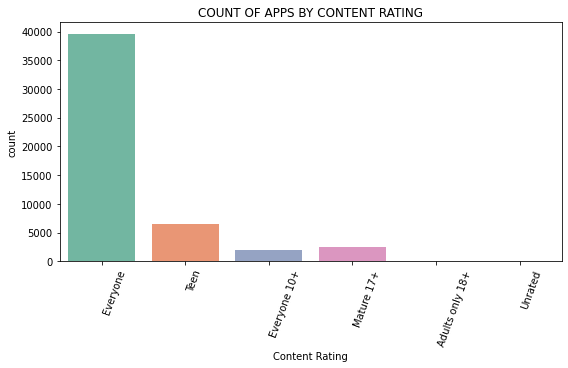

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='Content Rating', data=google_data, palette = 'Set2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha="left")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.title('COUNT OF APPS BY CONTENT RATING')
plt.show() 

Everyone Category got the highest number of Apps in general with the least being Adults only 18+ and Unrated

COUNT OF CATEGORIES AGAINST CONTENT RATING

**Which App Category has the most rated Content?**

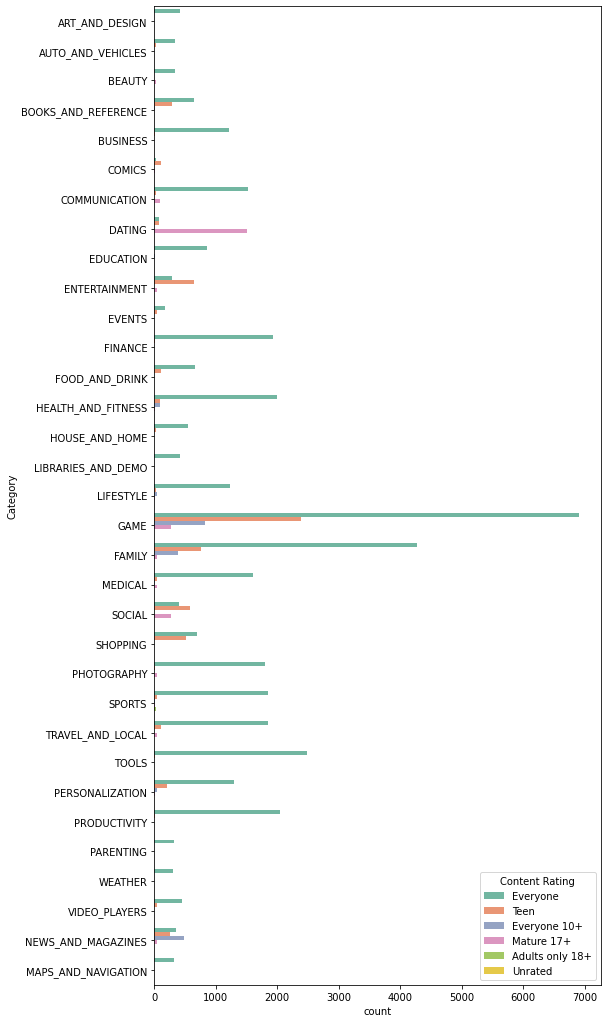

In [ ]:
plt.figure(figsize =(8,18))
sns.countplot( y = 'Category', hue = 'Content Rating', data = google_data, palette = 'Set2');


The most rated content APP is the Game App Category, followed by the Family App Category, with both having rated with the Everyone category having the most.




TYPES OF CONTENT RATING AND CATEGORIES THAT ARE FREE VS PAID

**Which Category of Apps from Content Rating Column and Type column are found in the play store?**

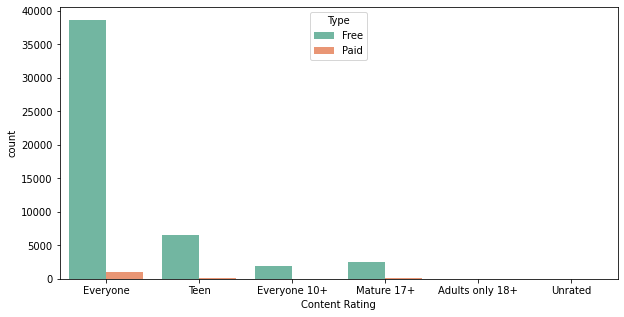

In [ ]:
plt.figure(figsize =(10,5))
sns.countplot( x= 'Content Rating', hue = 'Type', data = google_data, palette = 'Set2');


Everyone category has the highest number of free Apps than paid with the least being Everyone 10+ .

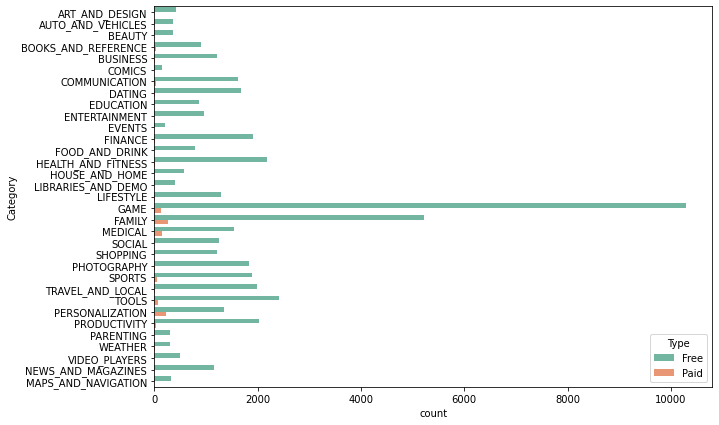

In [ ]:
plt.figure(figsize =(10,7))
sns.countplot( y= 'Category', hue = 'Type', data = google_data, palette = 'Set2');


**Which APPs are the most expensive?**




In [ ]:
paidapps=google_data[google_data['Type']=='Paid'].sort_values(by='Price',ascending=False).head(11)

In [ ]:
paidapps = paidapps[['App', 'Installs']]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


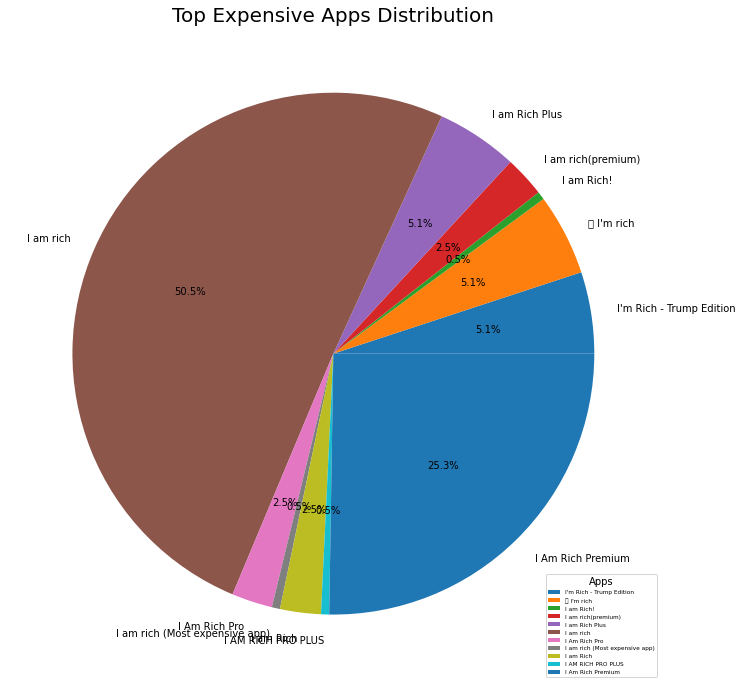

In [ ]:
plt.figure(figsize=(15,12));
plt.pie(paidapps.Installs, explode=None, labels=paidapps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(paidapps.App, loc="lower right", title="Apps", fontsize = "xx-small");

According to the pie above, the app I am rich is the most expensive app in the Google Play store, followed by I am Rich Premium.






# **Conclusion**

Review of both the datasets involved in the analysis show that the google_play table had 13columns majorly containing str objects, while the google_review table contains 5 columns containing str for the revie and float objects forcolumns containing the results of the sentiment analysis conducted on the review. The ratings column of the gooogle_play table has the null elements and would be subject to the most cleaning. The 'App' colum is present in both datasets and  acted as the point(PK/FK) for merging.

We were able to answer many questions that could not be answered simply by looking at the dataset with the help of Data Analysis. We  drew many conclusions and obtained useful information from the dataset by querying it and understanding the pattern and rate of growth and fall of any value.

Basic Questions
+ **What type of Apps are the most popular ?**

There are more free Apps than paid Apps in the playstore
+ **Which Category of Apps has the most Reviews?**

+ **Which Category App's have the most number of installs?**

Categories with the highest Installs are Game,Family,Communication ,News and Magazines and Tools
+ **Which Category has the highest number of Apps?**

Family and Game Category have the highest number of Apps with the least being Beauty and Comics
+ **Which Category of APPS from Content Rating Column is common on the Play Store?**

Everyone Category got the highest number of Apps in general with the least being Adults only 18+ and Unrated

The most rated content APP is the Game App Category, followed by the Family App Category, with both having rated with the Everyone category having the most.
+ **Which Category of Apps from Content Rating Column and Type column are found in the play store?**

Everyone category has the highest number of free Apps than paid with the least being Everyone 10+ .

+ **Which APPs are the most expensive ?**

I am rich is the most expensive app in the Google Play store, followed by I am Rich Premium.



